In [2]:
import numpy as np
from sklearn.datasets import load_files

In [3]:
import matplotlib.pyplot as mp
import seaborn as sn

In [4]:
reviews_train = load_files(r'D:\Dev\Python Workspace\PyCharm\sentimentalAnalysis\venv\Datasets\aimdb\train\\')


In [5]:
text_train, y_train = reviews_train.data, reviews_train.target

In [6]:
print("Number of documents in train data: {}".format(len(text_train)))


Number of documents in train data: 10002


In [7]:
print("Samples per class (train): {}".format(np.bincount(y_train)))

Samples per class (train): [5001 5001]


In [8]:
reviews_test = load_files(r'D:\Dev\Python Workspace\PyCharm\sentimentalAnalysis\venv\Datasets\aimdb\test\\')
text_test, y_test = reviews_test.data, reviews_test.target


In [9]:

print("Number of documentsin test data: {}".format(len(text_test)))
print("Samples per class (test): {}".format(np.bincount(y_test)))

Number of documentsin test data: 10002
Samples per class (test): [5001 5001]


In [10]:
# CountVectorizer is a text classification tool used to 
# form sparse matrices of texts while classifying
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(min_df=5, ngram_range=(2,2))
X_train = vect.fit(text_train).transform(text_train)
X_test = vect.transform(text_test)

print("Vocabulary size: {}".format(len(vect.vocabulary_)))
print("X_train: \n{}".format(repr(X_train)))
print("X_test:  \n{}".format(repr(X_test)))

feature_names = vect.get_feature_names()
print("Number of features: {}".format(len(feature_names)))

Vocabulary size: 56681
X_train: 
<10002x56681 sparse matrix of type '<class 'numpy.int64'>'
	with 1267921 stored elements in Compressed Sparse Row format>
X_test:  
<10002x56681 sparse matrix of type '<class 'numpy.int64'>'
	with 1180663 stored elements in Compressed Sparse Row format>
Number of features: 56681


In [11]:
# GridSearchCV finds best parameters available for the target model.

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)



d:\dev\python workspace\pycharm\sentimentalanalysis\venv\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\dev\python workspace\pycharm\sentimentalanalysis\venv\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

Best cross-validation score: 0.86
Best parameters:  {'C': 0.1}
Best estimator:  LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [12]:
lr = grid.best_estimator_
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Determining accuracy of algorithm
log_reg_accuracy = lr.score(X_train, y_pred)*100
print("Accuracy Score of Logistic Regression: {:.2f} %\n".format(log_reg_accuracy))

# Evaluating algorithms using confusion_matrix and report

from sklearn.metrics import classification_report, confusion_matrix
print("Confusion matrix:\n",confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n",classification_report(y_test,y_pred))

Accuracy Score of Logistic Regression: 85.26 %

Confusion matrix:
 [[4272  729]
 [ 729 4272]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      5001
           1       0.85      0.85      0.85      5001

    accuracy                           0.85     10002
   macro avg       0.85      0.85      0.85     10002
weighted avg       0.85      0.85      0.85     10002



In [13]:
pos = ["I've seen this story before but my kids haven't. Boy with troubled past joins military, faces his past, falls in love and becomes a man. "
       "The mentor this time is played perfectly by Kevin Costner; An ordinary man with common everyday problems who lives an extraordinary "
       "conviction, to save lives. After losing his team he takes a teaching position training the next generation of heroes. The young troubled "
       "recruit is played by Kutcher. While his scenes with the local love interest are a tad stiff and don't generate enough heat to melt butter, "
       "he compliments Costner well. I never really understood Sela Ward as the neglected wife and felt she should of wanted Costner to quit out of "
       "concern for his safety as opposed to her selfish needs. But her presence on screen is a pleasure. The two unaccredited stars of this movie "
       "are the Coast Guard and the Sea. Both powerful forces which should not be taken for granted in real life or this movie. The movie has some "
       "slow spots and could have used the wasted 15 minutes to strengthen the character relationships. But it still works. The rescue scenes are "
       "intense and well filmed and edited to provide maximum impact. This movie earns the audience applause. And the applause of my two sons."
       ]
print("Pos prediction: {}".format(lr.predict(vect.transform(pos))))

Pos prediction: [1]


In [14]:
pos1 = [" I loved the movie."]
print("Pos2 prediction: {}".format(lr.predict(vect.transform(pos1))))


Pos2 prediction: [1]


In [20]:
pos1 = [" The movie was bad."]
print("Pos1 prediction: {}".format(lr.predict(vect.transform(pos1))))


Pos1 prediction: [0]


In [17]:
# Implementing use NB classifier

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train, y_train)
import numpy as np
predicted_y = clf.predict(X_test)
nb_accuracy = clf.score(X_train, predicted_y)*100
print("Accuracy Score of NB classifier: {:.2f} %\n".format(nb_accuracy))

print("Confusion matrix:\n",confusion_matrix(y_test, predicted_y))
print("\nClassification Report:\n",classification_report(y_test, predicted_y))

Accuracy Score of NB classifier: 83.25 %

Confusion matrix:
 [[4480  521]
 [ 913 4088]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      5001
           1       0.89      0.82      0.85      5001

    accuracy                           0.86     10002
   macro avg       0.86      0.86      0.86     10002
weighted avg       0.86      0.86      0.86     10002



In [18]:
# Implementing SVM classifier

from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_predict = svclassifier.predict(X_test)
svm_accuracy = (svclassifier.score(X_train, y_predict))*100
print("Accuracy of SVM: {:.2f} %\n".format(svm_accuracy))

print("Confusion matrix:\n",confusion_matrix(y_test, y_predict))
print("\nClassification Report:\n",classification_report(y_test, y_predict))

Accuracy of SVM: 83.86 %

Confusion matrix:
 [[4212  789]
 [ 825 4176]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84      5001
           1       0.84      0.84      0.84      5001

    accuracy                           0.84     10002
   macro avg       0.84      0.84      0.84     10002
weighted avg       0.84      0.84      0.84     10002



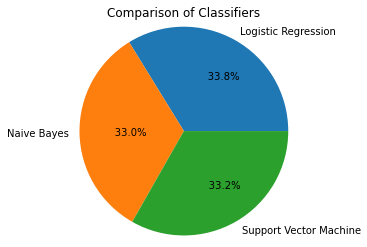

In [19]:
# Graphs to compare algorithms

list_of_accuracies = [log_reg_accuracy, nb_accuracy, svm_accuracy]
import warnings 
warnings.filterwarnings("ignore")

labels=['Logistic Regression', 'Naive Bayes', 'Support Vector Machine']
mp.pie( list_of_accuracies,
        labels=labels,
        autopct = '%10.1f%%',
        radius = 1.2
      )
# mp.xlabel("Classifiers Used")
# mp.ylabel("Accuracies")
# mp.legend()
mp.title("Comparison of Classifiers")
mp.show()

No handles with labels found to put in legend.


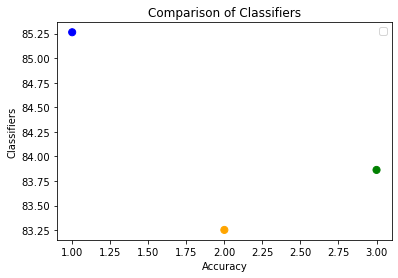

In [20]:
list_of_accuracies = [log_reg_accuracy, nb_accuracy, svm_accuracy]
left = [1,2,3]
groups=('Logistic Regression', 'Naive Bayes', 'Support Vector Machine')
import random

mp.scatter(left, list_of_accuracies, s=50, c=['blue','orange','green'])
mp.title("Comparison of Classifiers")
mp.xlabel('Accuracy')
mp.ylabel('Classifiers')
mp.legend()
mp.title("Comparison of Classifiers")
mp.show()

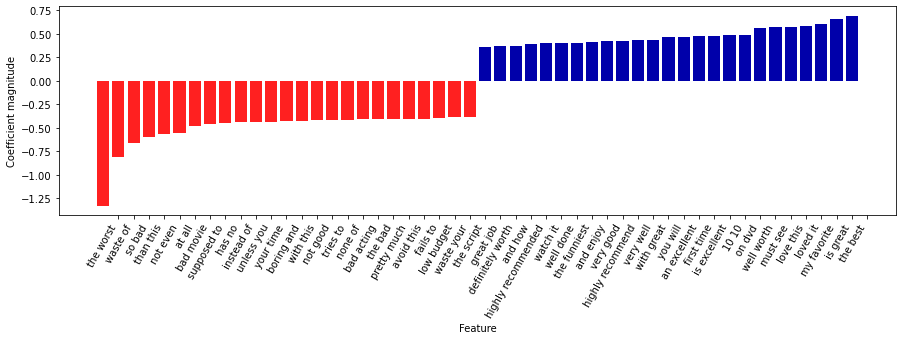

In [21]:
#------Plotting best and worst among 25 features--------------------------------------------------------------------------------

import matplotlib.pyplot as plt 
import mglearn

mglearn.tools.visualize_coefficients(grid.best_estimator_.coef_, feature_names, n_top_features=25)
plt.show()